In [2]:
import sqlalchemy
import pandas as pd
from sqlalchemy import text, select
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import log

In [3]:
from sqlalchemy import create_engine, Table, Column
from sqlalchemy import Integer, String, Text, MetaData

engine = create_engine('sqlite:///../data/raw/lyrics.db', echo=False)

meta = MetaData()

artists = Table('artists', meta,
                Column('artist', String, primary_key=True),
                Column('artist_url', String))

lyrics = Table('lyrics', meta,
               Column('artist', String),
               Column('song_title', String),
               Column('year', Integer),
               Column('song_url', String, primary_key=True),
               Column('lyrics', Text))

genres = Table('genre', meta,
               Column('id', Integer, primary_key=True, autoincrement=True),
               Column('song_url', String),
               Column('genre', String))

styles = Table('style', meta,
               Column('id', Integer, primary_key=True, autoincrement=True),
               Column('song_url', String),
               Column('style', String))

if __name__ == '__main__':
    meta.create_all(engine)


In [4]:
conn = engine.connect()

In [5]:
query = text('SELECT * FROM lyrics')
artists = conn.execute(query).fetchall()
data = pd.DataFrame(artists)
data.columns = ['artist', 'song', 'year', 'url', 'lyric']
data_url = data.copy()
data = data.drop(labels='url', axis=1)

In [6]:
data.lyric.isna().sum()

382600

In [7]:
data.head()

,artist,song,year,lyric
0,A B,Con el Tic Tac del Reloj,2000.0,Era tan facil soÃ±ar\r\nQue te podias quedar\r...
1,"A Band Called ""O""",Sleeping,1975.0,None
2,"A Band Called ""O""",Take Your Time,1975.0,None
3,A Band Called David,Another Try,1977.0,"How have You been? Lovely to see You,\nMy how ..."
4,A Band Called David,Just the Same,1977.0,None


In [8]:
len(data)

1250843

In [9]:
len(data.artist.unique())

116773

In [10]:
data.song.value_counts().head(50)

NO LYRICS FOUND                                       15574
St. Louis Blues                                        1018
Body and Soul                                          1014
Stardust                                                990
Over the Rainbow                                        954
Intro                                                   951
Have Yourself a Merry Little Christmas                  901
Embraceable You                                         780
The Nearness of You                                     633
Skylark                                                 614
After You've Gone                                       606
O Little Town of Bethlehem                              602
My Foolish Heart                                        595
Laura                                                   593
In a Sentimental Mood                                   593
I'll Remember April                                     577
You Don't Know What Love Is             

In [11]:
stl_blues = data[data.song == 'St. Louis Blues']

In [12]:
stl_blues.sort_values('year')

,artist,song,year,lyric
694232,Louis Armstrong & His Orchestra,St. Louis Blues,1934.0,I hate to see\nThe evening sun go down\nI hate...
767002,Miff Mole,St. Louis Blues,1944.0,I hate to see that evening sun go down\nI hate...
305119,Don Byas,St. Louis Blues,1949.0,I hate to see that evening sun go down\nI hate...
992360,Sidney Bechet,St. Louis Blues,1950.0,None
18501,Albert Ammons,St. Louis Blues,1950.0,None
...,...,...,...,...
944790,Roscoe Holcomb,St. Louis Blues,NaN,I hate to see that evening sun go down\r\nI ha...
973660,Scott Hamilton,St. Louis Blues,NaN,None
1047489,Syd Lawrence Orchestra,St. Louis Blues,NaN,I hate to see that evening sun go down\r\nI ha...
1114872,The Metronome All-Stars,St. Louis Blues,NaN,None


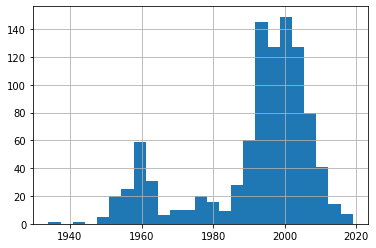

In [13]:
stl_blues.year.hist(bins=25)

In [14]:
data.artist.value_counts().head(50)

Elvis Presley         4010
Frank Sinatra         3399
Bing Crosby           2614
Ella Fitzgerald3      2465
Johnny Cash           2026
The Beach Boys        2001
Bob Dylan             1841
Louis Armstrong       1794
Nat King Cole         1589
Dean Martin           1430
Billie Holiday        1390
The Beatles           1329
Jerry Lee Lewis       1277
Judy Garland          1274
Johnny Hallyday       1251
Tony Bennett          1247
Edith Piaf            1181
George Jones          1175
Snoop Dogg            1147
David Bowie           1136
Grateful Dead         1130
Sarah Vaughan         1125
Lil Wayne             1053
Marvin Gaye           1040
Elton John            1032
B.B. King             1017
Ray Charles           1013
James Brown           1002
Diana Ross             997
Elvis Costello         995
Doris Day              994
Peggy Lee              958
Disney                 950
The Kinks              944
The Supremes           907
The Rolling Stones     902
Depeche Mode           897
R

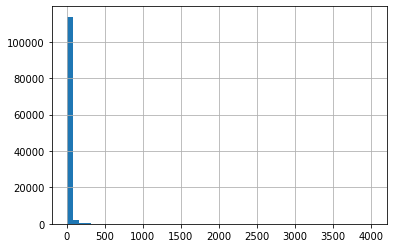

In [15]:
data.artist.value_counts().hist(bins=50)
plt.show()

In [16]:
elvis = data[data.artist == 'Elvis Presley']

In [17]:
elvis.head(15)

,artist,song,year,lyric
347612,Elvis Presley,Devoted to You [Stereo Debut],2019.0,"Darlin', you can count on me\r\nTill the sun d..."
347613,Elvis Presley,Stupid Cupid [Stereo Debut],2019.0,Stupid Cupid you're a real mean guy\r\nI'd lik...
347614,Elvis Presley,Wake Up Little Susie [Stereo Debut],2019.0,"Wake up, little Susie, wake up\r\nWake up, lit..."
347615,Elvis Presley,Wear My Ring Around Your Neck [Stereo Debut],2019.0,Won't you wear my ring around your neck\r\nTo ...
347616,Elvis Presley,Jailhouse Rock [From Jailhouse Rock],1975.0,The warden threw a party in the county jail\nT...
347617,Elvis Presley,Surrender,1960.0,When we kiss my heart's on fire\nBurning with ...
347618,Elvis Presley,Stranger in My Own Home Town,1969.0,I'm like a stranger\r\nLike a stranger in my o...
347619,Elvis Presley,I Feel So Bad,1961.0,None
347620,Elvis Presley,Trouble/Guitar Man [Opening] [Live],2019.0,None
347621,Elvis Presley,Trouble/Guitar Man,1968.0,If you're looking for trouble\r\nYou came to t...


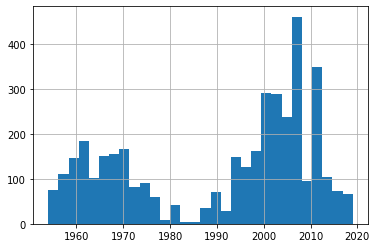

In [18]:
elvis.year.hist(bins=30)
plt.show()

In [19]:
# Remove bracketed song information
# bracket_pattern = "([^\[]+)"
# elvis['stripped'] = elvis.song.str.extract(bracket_pattern)
# bracket_index = elvis.song.str.match(bracket_pattern)
# elvis.loc[bracket_index, 'song'] = elvis.loc[bracket_index, 'stripped']
# elvis['song'] = elvis.song.str.strip()
# elvis['song'] = elvis.song.str.lower()
# elvis.head(15)

In [20]:
def clean_data(df):
    df.song = df.song.str.replace(r'\[.*','')
    df.song = df.song.str.lower()
    df.song = df.song.str.replace(r',','')
    df.song = df.song.str.replace('\.+(\(.+\))', '')
    df.song = df.song.str.replace('(\(.+\))\.+', '')
    df.song = df.song.str.replace("'", '')
    df.song = df.song.str.replace("’", '')
    df.song = df.song.str.strip()
    return df

In [21]:
elvis_clean = clean_data(elvis)
elvis_clean.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,artist,song,year,lyric
347612,Elvis Presley,devoted to you,2019.0,"Darlin', you can count on me\r\nTill the sun d..."
347613,Elvis Presley,stupid cupid,2019.0,Stupid Cupid you're a real mean guy\r\nI'd lik...
347614,Elvis Presley,wake up little susie,2019.0,"Wake up, little Susie, wake up\r\nWake up, lit..."
347615,Elvis Presley,wear my ring around your neck,2019.0,Won't you wear my ring around your neck\r\nTo ...
347616,Elvis Presley,jailhouse rock,1975.0,The warden threw a party in the county jail\nT...


In [22]:
len(elvis.song.unique())

1317

In [23]:
test = elvis.groupby(['artist','song']).min()

In [24]:
test.head(50)

year
artist        song                                                
Elvis Presley                                               2006.0
              (dance with the) guitar man                   2015.0
              (im) all shook up                             1987.0
              (intro) johnny b. goode                       1975.0
              (its a) long lonely highway                   1964.0
              (let me be your) teddy bear                   1957.0
              (let me be your)teddy bear                    2012.0
              (lets have a) party                           2000.0
              (maries the name of) his latest flame         1964.0
              (maries the name) his latest flame            1960.0
              (now and then theres) a fool such as i        1959.0
              (such an) easy question                       1962.0
              (thats what you get) for lovin me             1978.0
              (there will be) peace in the valley (for me)  2012.0
              (therell be) peace in the valley              1957.0
              (therell be) peace in the valley (for me)     1960.0
              (theres) good rockin tonight                  2010.0
              (theres) no room to rhumba in a sports car    1963.0
              (therll be) peace in the valley               1971.0
              (youre so square) baby i dont care            1959.0
              (youre so square) baby i dont care            2016.0
              (youre the) devil in disguise                 1968.0
              8. ive lost you                               2016.0
              a big hunk o love                             1959.0
              a big hunk o love (loop)                      2007.0
              a big hunk olove                              2001.0
              a boy like me a girl like you                 1962.0
              a cane and a high starched collar             1969.0
              a dogs life                                   1966.0
              a fool such as i                              1978.0
              a fool such as i (now and then theres)        2008.0
              a fool such as i (now and then)               2000.0
              a house that has everything                   1967.0
              a hundred years from now                      1971.0
              a litte less conversation                     2002.0
              a little bit of green                         1969.0
              a little less conversation                    1970.0
              a little less conversation (junkie xl remix)  2010.0
              a little less conversations                   2001.0
              a little less coversation                     2006.0
              a mess of blues                               1960.0
              a thing called love                           1972.0
              a whistling tune                              1962.0
              a world of our own                            1963.0
              adam and evil                                 1966.0
              after loving you                              1969.0
              aint that lovin you baby                      2014.0
              aint that loving you baby                     1968.0
              all i needed was the rain                     1969.0
              all shook up                                  1957.0

In [25]:
data_clean = clean_data(data)
data.head()

,artist,song,year,lyric
0,A B,con el tic tac del reloj,2000.0,Era tan facil soÃ±ar\r\nQue te podias quedar\r...
1,"A Band Called ""O""",sleeping,1975.0,None
2,"A Band Called ""O""",take your time,1975.0,None
3,A Band Called David,another try,1977.0,"How have You been? Lovely to see You,\nMy how ..."
4,A Band Called David,just the same,1977.0,None


In [26]:
len(data.song.unique())

375348

In [27]:
data.song.value_counts().head(50)

no lyrics found                           15574
body and soul                              1243
over the rainbow                           1223
st. louis blues                            1116
stardust                                   1105
have yourself a merry little christmas     1072
intro                                      1064
someone to watch over me                   1036
embraceable you                             910
but not for me                              781
lover come back to me                       723
the nearness of you                         704
ill remember april                          698
after youve gone                            692
aint misbehavin                             683
love is here to stay                        679
you dont know what love is                  670
how high the moon                           670
o little town of bethlehem                  669
caravan                                     667
santa claus is coming to town           

In [28]:
from fuzzywuzzy import fuzz

In [29]:
func = lambda x: fuzz.partial_ratio('teddy bear', x)
elvis['ratio'] = elvis.song.apply(func)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


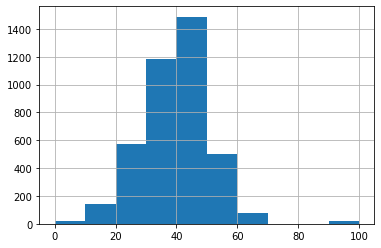

In [30]:
elvis.ratio.hist()
plt.show()

In [31]:
elvis[elvis.ratio > 80].head(50)

,artist,song,year,lyric,ratio
347672,Elvis Presley,(let me be your) teddy bear,1957.0,"Baby, let me be\r\nYour lovin' teddy bear\r\nP...",100
347747,Elvis Presley,(let me be your) teddy bear,2018.0,"Baby, let me be\nYour lovin' teddy bear\nPut a...",100
347960,Elvis Presley,teddy bear,2001.0,None,100
348297,Elvis Presley,medley: (let me be your) teddy bear/dont be cr...,2016.0,You know I can be found\nSitting home all alon...,100
348726,Elvis Presley,(let me be your) teddy bear,2012.0,"Oh baby let me be, your lovin' teddy bear\nPut...",100
348817,Elvis Presley,(let me be your) teddy bear,2012.0,None,100
349015,Elvis Presley,(let me be your)teddy bear,2012.0,None,100
349036,Elvis Presley,(let me be your) teddy bear,2012.0,None,100
349258,Elvis Presley,teddy bear (let me be your),1958.0,"Baby, let me be\nYour lovin' teddy bear\nPut a...",100
349271,Elvis Presley,(let me be your) teddy bear,1957.0,"Oh baby let me be, your lovin' teddy bear\nPut...",100


In [32]:
# from fuzzywuzzy.process import dedupe
# test = dedupe(contains_dupes=elvis.song, scorer=fuzz.partial_ratio)

In [33]:
lyrics = data.loc[~data.lyric.isnull()]

In [34]:
len(lyrics)

868243

In [35]:
lyrics_subset = lyrics.sample(10000, replace=False)

In [36]:
data.lyric.isna().sum()

382600

In [37]:
import nltk

In [38]:
tokens = lyrics_subset.lyric.apply(nltk.word_tokenize)
# lyrics_subset.head()

In [39]:
tokens

1085466    [You, `, re, about, to, believe, in, love, aga...
475964     [Eure, Liebe, überflutet, mich, Wir, brechen, ...
770378     [You, do, n't, have, to, have, a, hanker, To, ...
293672     [I, put, my, hand, into, my, pocket, I, found,...
605992     [You, say, it, 's, time, to, stay, behind, All...
                                 ...                        
1197668    [Little, Jimmy, 's, gone, Way, out, of, the, b...
876222     [It, 's, warm, in, here, ., I, see, you, ., So...
540167     [Let, me, tell, you, bout, a, girl, I, know, s...
2995       [Here, I, am, I, 'm, looking, for, a, place, t...
488677     [``, What, 'd, you, do, last, night, ?, '', ``...
Name: lyric, Length: 10000, dtype: object

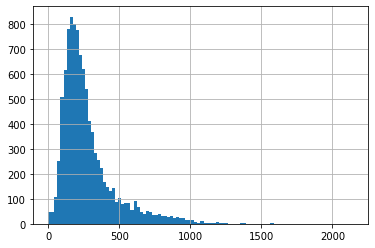

In [40]:
tokens.apply(len).hist(bins=100)

In [41]:
tokens.apply(len).min()

1

In [42]:
tokens[tokens.apply(len) < 7]

533532                   [[, Instrumental, ]]
167581                         [sleepwalking]
1021687     [oooooooooohhhhhh, aaaaaaahhhhhh]
435384                   [[, instrumental, ]]
237571                       [[, instr, ., ]]
854497       [gon, na, make, you, come, back]
1243484                  [(, instrumental, )]
480124                                  [Sal]
400613               [Dick, Kunc, :, Fade, !]
904861                   [[, Instrumental, ]]
713458                   [Otra, Bolero, Otra]
18525                         [vocalizations]
939451     [(, Geesin, ), (, Instrumental, )]
219441                   [[, Instrumental, ]]
867865                   [[, Instrumental, ]]
1213048                  [(, Instrumental, )]
645823                    [Turn, It, On, ...]
1083478                  [[, Instrumental, ]]
693924                   [[, Instrumental, ]]
296816                        [[, Talking, ]]
297058                        [Ass-N-Titties]
253431                   [(, instr

In [43]:
# Remove stopwords
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

tokens = tokens.apply(lambda x: [i for i in x if i not in en_stops])

In [44]:
# Stem words
from nltk.stem.porter import PorterStemmer

tokens = tokens.apply(lambda x: [PorterStemmer().stem(i) for i in x])

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit_transform(lyrics.sample(10000, replace=False))

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

# Genre Data

In [46]:
query = text('SELECT * FROM genre')
genre_results = conn.execute(query).fetchall()
genres = pd.DataFrame(genre_results)
genres.columns = ['id', 'url', 'genre']

In [47]:
print(genres.head(), genres.shape, genres.url.unique().shape)

   id                                                url  \
0   1            /lyric/31028106/Leo+Dan/Por+Un+Caminito   
1   2            /lyric/31028106/Leo+Dan/Por+Un+Caminito   
2   3  /lyric/12198554/Tom+T.+Hall/More+About+John+Henry   
3   4         /lyric/33853567/Garth+Brooks/Call+Me+Claus   
4   5      /lyric/27330086/Cannonball+Adderley/Who+Cares   

                    genre  
0                   Latin  
1                     Pop  
2  Folk, World, & Country  
3  Folk, World, & Country  
4                    Jazz   (204687, 3) (134673,)


In [48]:
genres.groupby('url').count().sort_values('genre')

,id,genre
url,,
/lyric/31537530/Angels+%26+Airwaves/The+Wolfpack,1,1
/lyric/5391852/Mai+Kuraki/Secret+of+My+Heart,1,1
/lyric/3157979/Victim%27s+Family/My+Evil+Twin,1,1
/lyric/31579690/Eko+Fresh/Gheddo+Reloaded,1,1
/lyric/31579686/Samy+Deluxe/Fettsackstyle,1,1
...,...,...
/lyric/2597435/Vonda+Shepard/I+Only+Want+to+Be+With+You,64,64
/lyric/1517645/Rosario/Mucho+Por+Vivir,65,65
/lyric/36191750/Banda+RPB/Metr%C3%B3pole,75,75


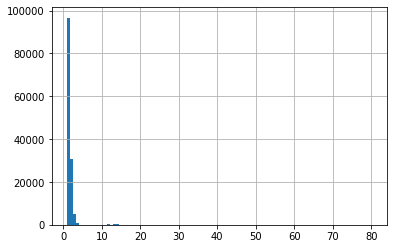

In [49]:
genres.groupby('url').count().genre.hist(bins=100)

In [50]:
genres.groupby('genre').count().sort_values('id', ascending=False)

,id,url
genre,,
Rock,56226,56226
Pop,46089,46089
Jazz,18897,18897
Electronic,17622,17622
"Folk, World, & Country",17236,17236
Hip Hop,14935,14935
Funk / Soul,12355,12355
Latin,7190,7190
Blues,5270,5270


## Word Clouds

In [51]:
genres[0:100].pivot(index='url', columns='genre')

id             \
genre                                              Blues Children's   
url                                                                   
/lyric/10070915/Frank+Sinatra/Mighty+Lak%27a+Rose    NaN        NaN   
/lyric/10154255/In+the+Woods.../Let+There+Be+Mo...   NaN        NaN   
/lyric/10221098/Charles+Bullock/All+That+I%27m+...   NaN        NaN   
/lyric/11945724/Ben%27s+Brother/Carry+On             NaN        NaN   
/lyric/12198554/Tom+T.+Hall/More+About+John+Henry    NaN        NaN   
...                                                  ...        ...   
/lyric/8245115/Dyango/Suspiros+de+Espa%C3%B1a        NaN        NaN   
/lyric/967424/Gamilah+Shabazz/Who+Am+I%3F            NaN        NaN   
/lyric/9837694/The+Chiffons/Sailor+Boy               NaN        NaN   
/lyric/9884889/Whitney+Houston/My+Heart+Is+Calling   NaN        NaN   
/lyric/9988334/Sy+Oliver/Because+of+You              NaN        NaN   

                                                               \
genre                                              Electronic   
url                                                             
/lyric/10070915/Frank+Sinatra/Mighty+Lak%27a+Rose         NaN   
/lyric/10154255/In+the+Woods.../Let+There+Be+Mo...        NaN   
/lyric/10221098/Charles+Bullock/All+That+I%27m+...        NaN   
/lyric/11945724/Ben%27s+Brother/Carry+On                  NaN   
/lyric/12198554/Tom+T.+Hall/More+About+John+Henry         NaN   
...                                                       ...   
/lyric/8245115/Dyango/Suspiros+de+Espa%C3%B1a             NaN   
/lyric/967424/Gamilah+Shabazz/Who+Am+I%3F                 NaN   
/lyric/9837694/The+Chiffons/Sailor+Boy                    NaN   
/lyric/9884889/Whitney+Houston/My+Heart+Is+Calling        NaN   
/lyric/9988334/Sy+Oliver/Because+of+You                   NaN   

                                                                           \
genre                                              Folk, World, & Country   
url                                                                         
/lyric/10070915/Frank+Sinatra/Mighty+Lak%27a+Rose                     NaN   
/lyric/10154255/In+the+Woods.../Let+There+Be+Mo...                    NaN   
/lyric/10221098/Charles+Bullock/All+That+I%27m+...                    NaN   
/lyric/11945724/Ben%27s+Brother/Carry+On                              NaN   
/lyric/12198554/Tom+T.+Hall/More+About+John+Henry                     3.0   
...                                                                   ...   
/lyric/8245115/Dyango/Suspiros+de+Espa%C3%B1a                        90.0   
/lyric/967424/Gamilah+Shabazz/Who+Am+I%3F                             NaN   
/lyric/9837694/The+Chiffons/Sailor+Boy                                NaN   
/lyric/9884889/Whitney+Houston/My+Heart+Is+Calling                    NaN   
/lyric/9988334/Sy+Oliver/Because+of+You                               NaN   

                                                                              \
genre                                              Funk / Soul Hip Hop  Jazz   
url                                                                            
/lyric/10070915/Frank+Sinatra/Mighty+Lak%27a+Rose          NaN     NaN  19.0   
/lyric/10154255/In+the+Woods.../Let+There+Be+Mo...         NaN     NaN   NaN   
/lyric/10221098/Charles+Bullock/All+That+I%27m+...         NaN     NaN   NaN   
/lyric/11945724/Ben%27s+Brother/Carry+On                   NaN     NaN   NaN   
/lyric/12198554/Tom+T.+Hall/More+About+John+Henry          NaN     NaN   NaN   
...                                                        ...     ...   ...   
/lyric/8245115/Dyango/Suspiros+de+Espa%C3%B1a              NaN     NaN   NaN   
/lyric/967424/Gamilah+Shabazz/Who+Am+I%3F                  NaN    53.0   NaN   
/lyric/9837694/The+Chiffons/Sailor+Boy                     NaN     NaN   NaN   
/lyric/9884889/Whitney+Houston/My+Heart+Is+Calling        76.0     NaN   NaN   
/lyric/9988334/Sy+Oliver/Beca

In [52]:
genres = genres.drop('id', axis=1)

In [53]:
genres = genres.drop_duplicates()

In [54]:
genres.groupby('url').count().sort_values('genre')

,genre
url,
/lyric/31537530/Angels+%26+Airwaves/The+Wolfpack,1
/lyric/31677152/dEUS/Theme+from+Turnpike,1
/lyric/3167636/Finger+Eleven/Tip,1
/lyric/31676106/Human/Human,1
/lyric/5523528/Deadsy/The+Elements,1
...,...
/lyric/30913048/Bleachers/Rollercoaster,7
/lyric/5546266/Frankie+Miller/Just+One+of+Those+Things,7
/lyric/23165580/Al+Green/Everything%27s+Gonna+Be+Alright,8


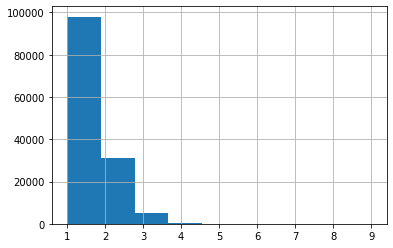

In [55]:
genres.groupby('url').count().genre.hist(bins=9)
plt.show()

In [56]:
genres.groupby('url')

In [57]:
# Create table of proportions
g_table = genres.pivot(index='url', columns='genre', values='genre')
g_table[g_table.isna()] = 0
g_table[g_table != 0] = 1
# g_table.apply(lambda x: x/sum(x), axis=1)

In [58]:
g_table[g_table['Blues'] == 1].apply(lambda x: sum(x)/sum(g_table['Blues'])).sort_values(ascending=False)

genre
Blues                     1.000000
Rock                      0.315381
Jazz                      0.173980
Funk / Soul               0.122784
Pop                       0.110151
Folk, World, & Country    0.090426
Hip Hop                   0.008865
Stage & Screen            0.007979
Electronic                0.006871
Latin                     0.004211
Reggae                    0.002660
Non-Music                 0.002216
Classical                 0.000665
Children's                0.000443
Brass & Military          0.000222
Ce genre                  0.000000
Ce genre Lyrics           0.000000
Ce genre de Mec           0.000000
genre                     0.000000
transgenres               0.000000
Le genre féminin          0.000000
Rapgenre                  0.000000
genres                    0.000000
 Buy This Song            0.000000
dtype: float64

In [59]:
genre_pct = (genres.genre.value_counts()/len(genres))
genre_gt1pct = genre_pct[genre_pct > 0.01].index.tolist()
genre_gt5pct = genre_pct[genre_pct > 0.05].index.tolist()

In [60]:
len(genre_gt5pct)

7

In [61]:
genre_trimmed = genres[genres.genre.isin(genre_gt5pct)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143ef7150>]],
      dtype=object)

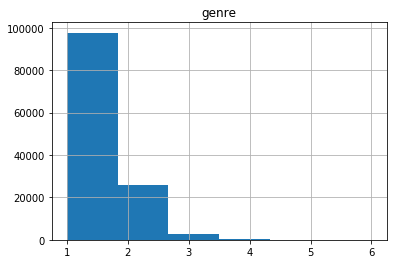

In [62]:
genre_trimmed.groupby('url').count().hist(bins=6)

In [63]:
single_genre = genres.groupby('url').count()
single_genre = single_genre[single_genre.genre == 1].index.tolist()

In [64]:
test = genres[genres.url.isin(single_genre)]

In [65]:
test.genre.value_counts()

Rock                      31475
Pop                       16132
Folk, World, & Country    10047
Jazz                       9785
Hip Hop                    9781
Electronic                 7304
Funk / Soul                5784
Latin                      2471
Reggae                     1759
Blues                      1756
Stage & Screen              654
genre                       545
Classical                   317
Children's                   92
Non-Music                    43
Brass & Military              9
genres                        6
Ce genre de Mec               5
Ce genre                      2
transgenres                   1
Le genre féminin              1
Name: genre, dtype: int64

# Document modeling

In [66]:
song_1g = data_url[data_url.url.isin(single_genre)]
song_genre = song_1g.merge(right=genres, on='url')
# song_genre.drop('id', axis=1)
song_genre.head()

,artist,song,year,url,lyric,genre
0,A Band Called David,Time,1977.0,/lyric/1276610/A+Band+Called+David/Time,Well He hasn't always been around\r\nAnd He wo...,Children's
1,A Blue Ocean Dream,The Time,2004.0,/lyric/7827470/A+Blue+Ocean+Dream/The+Time,"this is the time, these are the days, your lif...",Electronic
2,A Boogie wit da Hoodie,Keke,2018.0,/lyric/34837325/A+Boogie+wit+da+Hoodie/Keke,(Scum Gang!)\r\n\r\nI'll be on the block on th...,Hip Hop
3,A Breach of Silence,The Darkest Road,2014.0,/lyric/31057587/A+Breach+of+Silence/The+Darkes...,It's not enough to know I'm breathing.\nI've g...,Rock
4,A Change of Pace,Prepare the Masses,2006.0,/lyric/9008429/A+Change+of+Pace/Prepare+the+Ma...,Prepare the masses 'cause this means war\nAnd ...,Rock


## Song language

In [67]:
from langdetect import detect

result = []
for lyr in tqdm(song_genre.lyric):
    if len(lyr) >= 50:
        try:
            result.append(detect(lyr[:50]))
        except:
            result.append(detect(lyr[50:]))
    else:
        result.append(detect(lyr))
    

In [68]:
len(result)

97969

In [71]:
from collections import Counter
Counter(result).most_common(10)

[('en', 81561),
 ('fr', 4764),
 ('es', 3154),
 ('it', 1439),
 ('de', 1247),
 ('pt', 938),
 ('af', 696),
 ('so', 552),
 ('nl', 497),
 ('id', 483)]

In [77]:
is_english = pd.Series(result) == 'en'
song_genre_en = song_genre[is_english]

## Word Clouds

In [78]:
from wordcloud import WordCloud

def make_wordcloud(text):
    cloud = WordCloud().generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [79]:
rock   = song_genre_en[song_genre.genre == 'Rock'].lyric.str.cat(sep =' ')
hiphop = song_genre_en[song_genre.genre == 'Hip Hop'].lyric.str.cat(sep =' ')
folk   = song_genre_en[song_genre.genre == 'Folk, World, & Country'].lyric.str.cat(sep =' ')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


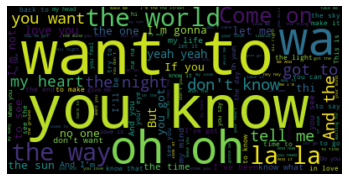

In [80]:
make_wordcloud(rock)

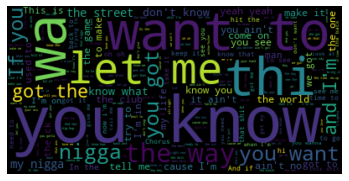

In [81]:
make_wordcloud(hiphop)

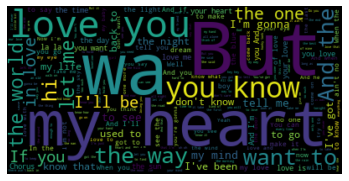

In [82]:
make_wordcloud(folk)

## tf-idf

In [83]:
# lemmatization
lemma_lyr = song_genre_en.lyric
lemma_lyr = [l.lower() for l in lemma_lyr]
lemma_lyr = [nltk.word_tokenize(l) for l in lemma_lyr]

In [84]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [85]:
lemma_lyr2 = []
for l in lemma_lyr:
    lem = [w for w in l if w not in en_stops and w.isalnum()]
    lemma_lyr2.append(lem)

In [ ]:
# Very useful site re: tf-idf: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/

In [86]:
from collections import Counter

corpus_tf = Counter()
doc_list  = []
for d in tqdm(lemma_lyr2):
    corpus_tf += Counter(d)
    doc_list.append(Counter(d))


In [ ]:
# 1. Number of documents
num_docs = len(doc_list)
# 2. Number of documents in which each word exists
num_docs_w_word = {}
# 3. Number of occurrences of each word in each document
corp_word_freq = Counter()
# 4. Total number of word occurrences in corpus
num_words = 0
# 5. Counts within each document
doc_word_freq = []

for d in tqdm(doc_list):
    num_words += len(d)
    c = Counter(d)
    doc_word_freq.append(c)
    corp_word_freq += c
    for k in c.keys():
        if k not in num_docs_w_word:
            num_docs_w_word[k] = 1
        else:
            num_docs_w_word[k] += 1


In [ ]:
# Inverse document frequency
idf = {}
for word, count in num_docs_w_word.items():
    idf[word] = 1 + log(num_docs / count)

In [ ]:
# Normalized term frequencies
norm_term_freq = []
for doc in tqdm(doc_word_freq):
    next_dict = {}
    for word, count in doc.items():
        next_dict[word] = count / sum(doc.values())
    norm_term_freq.append(next_dict)

In [ ]:
# Inverse term freq
tf_idf = []
for doc in tqdm(norm_term_freq):
    next_dict = {}
    for word, weight in doc.items():
        next_dict[word] = weight * idf[word] 
    tf_idf.append(next_dict)

In [ ]:
# Clustering approach based on vectors of words

In [ ]:
# Brief investigation of words
docs_w_word = pd.DataFrame.from_dict(num_docs_w_word, orient='index')
docs_w_word.columns = ['count']

In [ ]:
# Which words are in the most documents?
docs_w_word.sort_values('count', ascending=False)[:30]

In [ ]:
# Some words happen up to 40k times, but most are in this range
docs_w_word.hist('count', bins=100, range=[0, 250])
plt.show()

In [ ]:
# What proportion of words occur more than once?
sum(docs_w_word['count'] > 1) / len(docs_w_word)

## sklearn tf-idf implementation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
help(TfidfVectorizer)

In [ ]:
tf_vec = TfidfVectorizer(strip_accents='unicode', 
                         analyzer='word')
tf_vec.fit_transform(lyrics.lyric)

In [ ]:
tf_vec

In [ ]:
# corpus_tf.most_common()[::-1][:100]

In [ ]:
artist_out = data.groupby('artist').count().sort_values('song', ascending=False)
artist_out = artist_out.rename_axis(index={'artist':'artist_name'})
artist_out.to_csv('lyrics_artist_ranked.csv')